In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [ ]:
# Data

In [3]:
from sklearn.datasets import make_sparse_coded_signal

In [4]:
num_of_components = 512
num_of_features = 100
num_of_nonzero_coeff = 17

In [6]:
# make_sparse_coded_signal? # To check what this includes 

In [7]:
y,X,w = make_sparse_coded_signal(n_samples=1,n_components=num_of_components,n_features=num_of_features,n_nonzero_coefs=num_of_nonzero_coeff,random_state=0)

c:\Users\Yash Bhagwani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_samples_generator.py:1335: FutureWarning: The default value of data_transposed will change from True to False in version 1.3
  warnings.warn(


In [9]:
print("y.shape: ",y.shape) # y is Column signal or signal
print("X.shape: ",X.shape) # X is the Dictionary
print("w.shape: ",w.shape) # w is Sparse approximation or sparse representation

y.shape:  (100,)
X.shape:  (100, 512)
w.shape:  (512,)


In [37]:
np.random.seed(0)
noise = 0.15 * np.random.randn(len(y)) # randn = random number
y_noise = y + noise
print("y_noise shape: ",y_noise.shape)

y_noise shape:  (100,)


In [38]:
indx = w.nonzero()
indx

(array([ 46,  68,  76, 101, 123, 158, 195, 226, 227, 268, 269, 355, 359,
        399, 467, 492, 494], dtype=int64),)

In [39]:
np.array([1,0,0,-2]).nonzero() # output mey ye dikhega ki kis index pr non zero element hai be it positive or negative

(array([0, 3], dtype=int64),)

C:\Users\Yash Bhagwani\AppData\Local\Temp\ipykernel_26108\3280097240.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(indx[0], w[indx], use_line_collection=True)


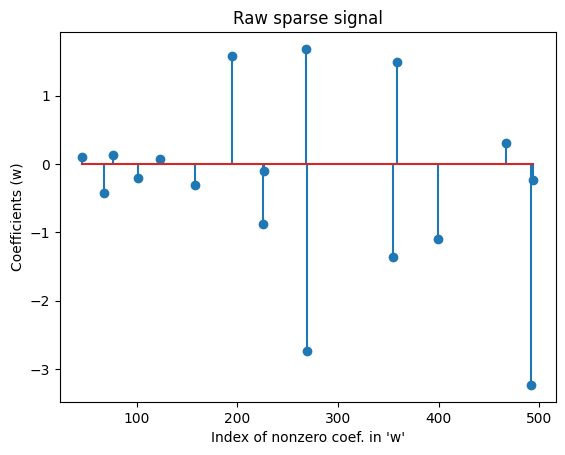

In [40]:
# Raw Signal
plt.stem(indx[0], w[indx], use_line_collection=True)
plt.xlabel("Index of nonzero coef. in 'w'")
plt.ylabel("Coefficients (w)")
plt.title("Raw sparse signal")
plt.show()

In [41]:
# Noise Free Reconstruction

In [42]:
noise_free_reconstruction = OrthogonalMatchingPursuit(n_nonzero_coefs=num_of_nonzero_coeff) # object of OrthogonalMatchingPursuit
noise_free_reconstruction.fit(X,y)
coeff_noise_free_reconstruction = noise_free_reconstruction.coef_
indx_noise_free_reconstruction = coeff_noise_free_reconstruction.nonzero()

In [43]:
indx_noise_free_reconstruction

(array([ 46,  68,  76, 101, 123, 158, 195, 226, 227, 268, 269, 355, 359,
        399, 467, 492, 494], dtype=int64),)

C:\Users\Yash Bhagwani\AppData\Local\Temp\ipykernel_26108\1835034814.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(indx_noise_free_reconstruction[0], coeff_noise_free_reconstruction[indx_noise_free_reconstruction[0]], use_line_collection=True)


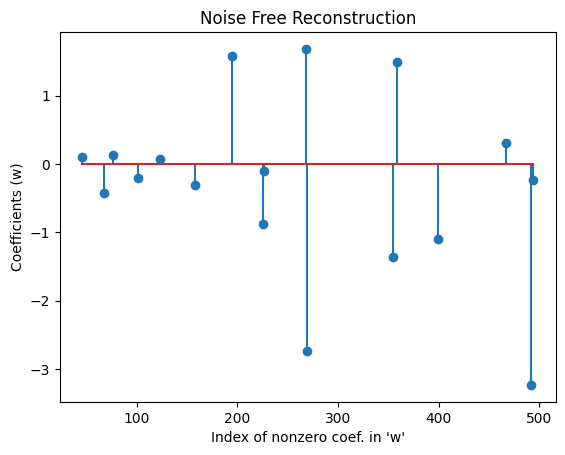

In [44]:
plt.stem(indx_noise_free_reconstruction[0], coeff_noise_free_reconstruction[indx_noise_free_reconstruction[0]], use_line_collection=True)
plt.xlabel("Index of nonzero coef. in 'w'")
plt.ylabel("Coefficients (w)")
plt.title("Noise Free Reconstruction")
plt.show()

In [45]:
# Noisy Data Reconstruction

In [46]:
noise_free_reconstruction = OrthogonalMatchingPursuit(n_nonzero_coefs=num_of_nonzero_coeff) # object of OrthogonalMatchingPursuit
noise_free_reconstruction.fit(X,y_noise)
coeff_noise_free_reconstruction = noise_free_reconstruction.coef_
indx_noise_free_reconstruction = coeff_noise_free_reconstruction.nonzero()

C:\Users\Yash Bhagwani\AppData\Local\Temp\ipykernel_26108\3244382605.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(indx_noise_free_reconstruction[0], coeff_noise_free_reconstruction[indx_noise_free_reconstruction[0]], use_line_collection=True)


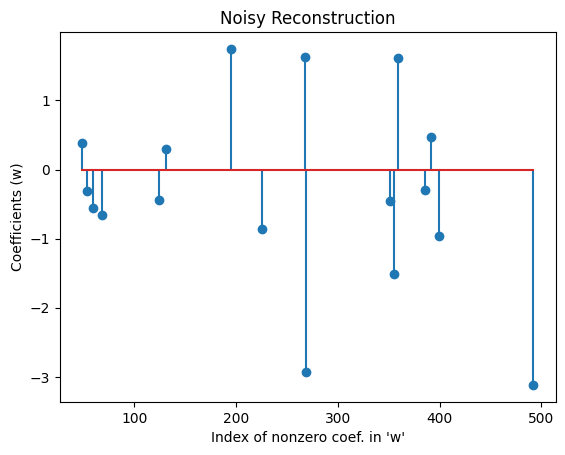

In [47]:
plt.stem(indx_noise_free_reconstruction[0], coeff_noise_free_reconstruction[indx_noise_free_reconstruction[0]], use_line_collection=True)
plt.xlabel("Index of nonzero coef. in 'w'")
plt.ylabel("Coefficients (w)")
plt.title("Noisy Reconstruction")
plt.show()

In [48]:
# Noisy Reconstruction CV
from sklearn.linear_model import OrthogonalMatchingPursuitCV

In [49]:
noise_free_reconstruction = OrthogonalMatchingPursuitCV() # object of OrthogonalMatchingPursuit
noise_free_reconstruction.fit(X,y_noise)
coeff_noise_free_reconstruction = noise_free_reconstruction.coef_
indx_noise_free_reconstruction = coeff_noise_free_reconstruction.nonzero()

C:\Users\Yash Bhagwani\AppData\Local\Temp\ipykernel_26108\3787438426.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(indx_noise_free_reconstruction[0], coeff_noise_free_reconstruction[indx_noise_free_reconstruction[0]], use_line_collection=True)


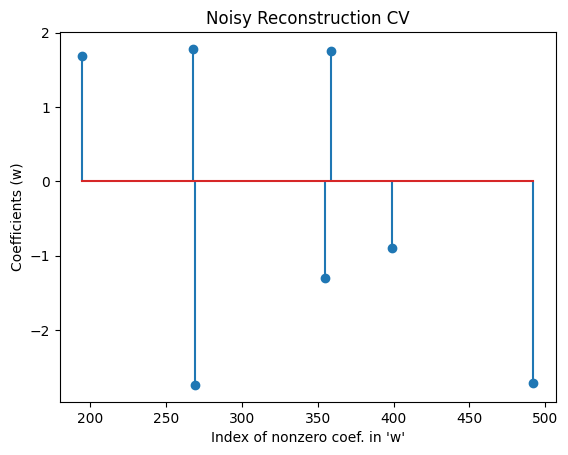

In [50]:
plt.stem(indx_noise_free_reconstruction[0], coeff_noise_free_reconstruction[indx_noise_free_reconstruction[0]], use_line_collection=True)
plt.xlabel("Index of nonzero coef. in 'w'")
plt.ylabel("Coefficients (w)")
plt.title("Noisy Reconstruction CV")
plt.show()